Autor: Carlos Juàrez
Fecha: 16-oct-2025
Descripciòn: Sistema de orden superior


In [1]:
# Soluciòn del sistema
# Modulos
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import odeint

In [2]:
# Parametros del sistema
Mc = 1000  # Masa del carro (kg)
Mw = 50   # Masa de la rueda (kg)
Kc = 20000  # Constante del resorte (N/m)
Bc = 1000  # Coeficiente de amortiguamiento (N·s/m)
Kw = 150000  # Constante del resorte de la rueda (N/m)
Bw = 500  # Coeficiente de amortiguamiento de la rueda (N·s/m)
# Gravedad
g = 9.81  # Aceleración debida a la gravedad (m/s^2)
# Entrada del sistema (perfil de la carretera)
def road_profile(t):
    if t < 1:
        return 0
    else:
        return 0.05  # Un salto de 5 cm en la carretera
        return 0 

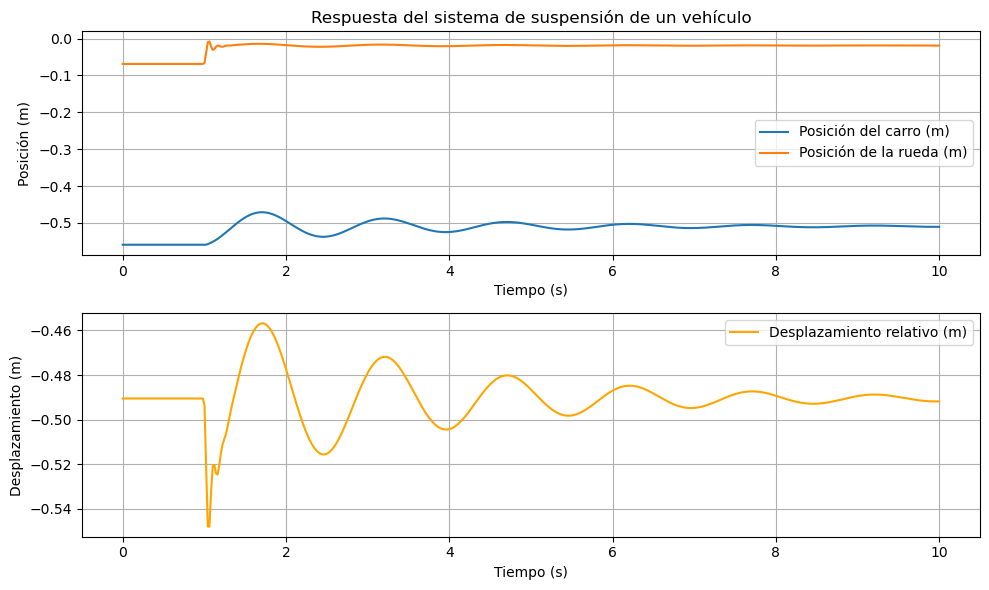

In [3]:
# Ecuaciones del sistema
def system_equations(y, t):
    x1, x2, x3, x4= y
    r = road_profile(t)
    dr = (road_profile(t + 0.01) - road_profile(t)) / 0.01  # Derivada de la entrada
    dx1dt = x2
    dx2dt = ( -Kc*(x1 - x3) - Bc*(x2 - x4) ) / Mc - g
    dx3dt = x4
    dx4dt = (-Bw*(x4 - dr) - Kw*(x3-r) + Bc*(x2-x4) + Kc*(x1 -x3) ) / Mw - g
    return [dx1dt, dx2dt, dx3dt, dx4dt]

# Condiciones iniciales
r0 = road_profile(0)
x10 = -Mc * g / Kc  - (Mc+Mw)/Kw * g + r0  # Posición inicial del carro (equilibrio)
x20 = 0  # Velocidad inicial del carro
x30 = r0 - (Mw+Mc) * g / Kw  # Posición inicial de la rueda
x40 = 0  # Velocidad inicial de la rueda
y0 = [x10, x20, x30, x40]  # [posición carro, velocidad carro, posición rueda, velocidad rueda]
# Tiempo de simulación
t = np.linspace(0, 10, 500)  # 5 segundos
# Solución de las ecuaciones diferenciales
solution = odeint(system_equations, y0, t)
x1 = solution[:, 0]  # Posición del carro
x3 = solution[:, 2]  # Posición de la rueda
# Graficar resultados
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, x1, label='Posición del carro (m)')
plt.plot(t, x3, label='Posición de la rueda (m)')
plt.title('Respuesta del sistema de suspensión de un vehículo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (m)')
plt.legend()
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(t, x1 - x3, label='Desplazamiento relativo (m)', color='orange')
plt.xlabel('Tiempo (s)')
plt.ylabel('Desplazamiento (m)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

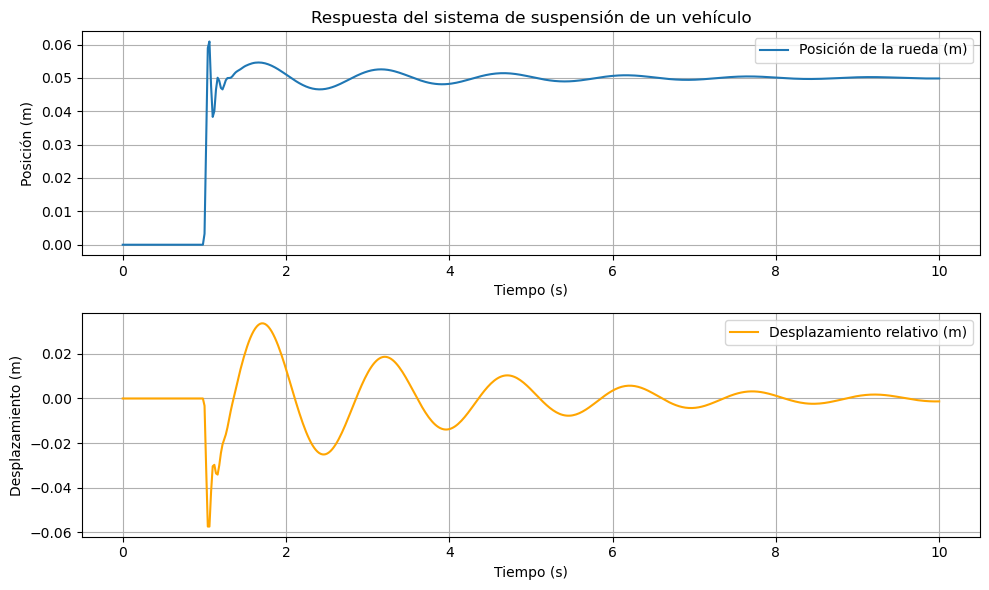

In [13]:
# Nuevo sistema en punto de operación
# Ecuaciones del sistema linealizado
def linearized_system(y, t):   
    x1, x2, x3, x4= y
    r = road_profile(t)
    dr = (road_profile(t + 0.01) - road_profile(t)) / 0.01  # Derivada de la entrada
    dx1dt = x2
    dx2dt = ( -Kc*(x1 - x3) - Bc*(x2 - x4) ) / Mc 
    dx3dt = x4
    dx4dt = (-Bw*(x4 - dr) - Kw*(x3-r) + Bc*(x2-x4) + Kc*(x1 -x3) ) / Mw 
    return [dx1dt, dx2dt, dx3dt, dx4dt]
# Condiciones iniciales
y0_lin = [0, 0, 0, 0]  # [posición carro, velocidad carro, posición rueda, velocidad rueda]
# Solución de las ecuaciones diferenciales linealizadas
solution_lin = odeint(linearized_system, y0_lin, t)
x1_lin = solution_lin[:, 0]  # Posición del carro
x3_lin = solution_lin[:, 2]  # Posición de la rueda
# Graficar resultados del sistema linealizado
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
#plt.plot(t, x1_lin, label='Posición del carro (m)')
plt.plot(t, x3_lin, label='Posición de la rueda (m)')   
plt.title('Respuesta del sistema de suspensión de un vehículo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (m)')
plt.legend()
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(t, x1_lin - x3_lin, label='Desplazamiento relativo (m)', color='orange')
plt.xlabel('Tiempo (s)')
plt.ylabel('Desplazamiento (m)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [5]:
# Funcion de transferencia
import sympy as sp
s = sp.symbols('s')
sMc, sMw, sKc, sBc, sKw, sBw = sp.symbols('sMc sMw sKc sBc sKw sBw')
X1 = sp.Function('X1')(s)
X3 = sp.Function('X3')(s)
R = sp.Function('R')(s)

# Ecuaciones del sistema en Laplace
eq1 = sMc * s**2 * X1 + sBc * s * (X1-X3) + sKc * (X1-X3)
eq2 = sMw * s**2 * X3 + sBw * s * (X3 - R) + sKw * (X3 - R) - sBc * s * (X1 - X3) - sKc * (X1 - X3)
# Resolver el sistema de ecuaciones
sol = sp.solve((eq1, eq2), (X1, X3))
# Función de transferencia del carro respecto a la entrada de la carretera
print("Función de transferencia del carro respecto a la entrada de la carretera:")
TF_car = sol[X1] / R
TF_llanta = sol[X3] / R

Función de transferencia del carro respecto a la entrada de la carretera:


In [6]:
# sustituir valores numéricos
TF_car_num = TF_car.subs({sMc: Mc, sMw: Mw, sKc: Kc, sBc: Bc, sKw: Kw, sBw: Bw})
TF_llanta_num = TF_llanta.subs({sMc: Mc, sMw: Mw, sKc: Kc, sBc: Bc, sKw: Kw, sBw: Bw})

In [7]:
sp.simplify(TF_car_num)

10*(s**2 + 320*s + 6000)/(s**4 + 31*s**3 + 3430*s**2 + 3200*s + 60000)

In [8]:
np.roots([1,320,6000])

array([-300.,  -20.])

In [9]:
sp.simplify(TF_llanta_num)

10*(s**3 + 301*s**2 + 320*s + 6000)/(s**4 + 31*s**3 + 3430*s**2 + 3200*s + 60000)

In [10]:
np.roots([1,301,320,6000])

array([-300. +0.j        ,   -0.5+4.44409721j,   -0.5-4.44409721j])

In [11]:
np.roots([1,31,3430,3200, 60000])

array([-15.10675943+56.21669386j, -15.10675943-56.21669386j,
        -0.39324057 +4.18952869j,  -0.39324057 -4.18952869j])